In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
def load_pca_data(evec_file):
    col_names = ["Name", "PC1", "PC2", "PC3", "PC4", "Population"]
    df_pca = pd.read_csv(evec_file, delim_whitespace=True, header=0, names=col_names)
    # Remove next line again
    df_pca[["Sample", "Tool", "Fraction", "Seed"]] = df_pca["Name"].str.split("-", expand = True)
    df_pca = df_pca.assign(Population2 = df_pca["Sample"] + '-' + df_pca["Tool"] + '-' + df_pca["Fraction"])
    return df_pca

In [99]:
evec_file = "output/smartPCA_wrong_samplename/euraisa.evec"
df_pca = load_pca_data(evec_file)
df_pca

,Name,PC1,PC2,PC3,PC4,Population,Sample,Tool,Fraction,Seed,Population2
0,SA1004,0.0154,-0.0766,0.2824,-0.1449,Khomani,SA1004,None,None,None,NaN
1,SA063,0.0161,-0.0825,0.3058,-0.1551,Khomani,SA063,None,None,None,NaN
2,SA010,0.0164,-0.0859,0.3240,-0.1624,Khomani,SA010,None,None,None,NaN
3,SA064,0.0154,-0.0701,0.2525,-0.1254,Khomani,SA064,None,None,None,NaN
4,SA073,0.0145,-0.0754,0.2778,-0.1358,Khomani,SA073,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2592,HG005-seqtk_adna_trim-96-5,-0.0420,-0.0402,-0.0109,-0.0019,MyPop,HG005,seqtk_adna_trim,96,5,HG005-seqtk_adna_trim-96
2593,HG005-seqtk_adna_trim-96-6,-0.0418,-0.0401,-0.0109,-0.0015,MyPop,HG005,seqtk_adna_trim,96,6,HG005-seqtk_adna_trim-96
2594,HG005-seqtk_adna_trim-96-7,-0.0418,-0.0402,-0.0114,-0.0007,MyPop,HG005,seqtk_adna_trim,96,7,HG005-seqtk_adna_trim-96
2595,HG005-seqtk_adna_trim-96-8,-0.0416,-0.0394,-0.0110,-0.0015,MyPop,HG005,seqtk_adna_trim,96,8,HG005-seqtk_adna_trim-96


In [78]:
def load_population_list(pop_pca_file):
    """ Reads the csv file of the populations that have been used to generate
    the principal components. Adds color and symbol indeces to each 
    population for plotting """
    df_population = pd.read_csv(
        pop_pca_file, names=["Population"]).sort_values(by="Population")
    n_populations= len(df_population)
    n_colors = 10
    n_symbols = int(n_populations / n_colors+1)
    color_indices = [int(i / n_symbols) for i in range(n_populations)]
    symbol_indices = [i % n_symbols for i in range(n_populations)]
    df_population = df_population.assign(color_index=color_indices, 
                                         symbol_index=symbol_indices)
    return df_population

In [79]:
pop_pca_file = "input/smartPCA/poplist_eurasia.txt"
df_population = load_population_list(pop_pca_file)
df_population

,Population,color_index,symbol_index
0,Abkhasian,0,0
1,Adygei,0,1
2,Albanian,0,2
3,Aleut,0,3
4,Altaian,0,4
...,...,...,...
110,Uzbek,9,2
111,Xibo,9,3
112,Yakut,9,4
113,Yi,9,5


In [96]:
def load_sample_list(sample_file):
    df_sample = pd.read_csv(sample_file, sep="\t", 
                                names=["Name", "Sex", "Population"])
    df_sample[["Sample", "Tool", "Fraction", "Seed"]] = df_sample["Name"].str.split("-", expand = True)
    fraction2depth = {"06":".25X", 
                      "12":".5X", 
                      "24":"1X", 
                      "48":"2X", 
                      "96":"4X"}
    df_sample["CovDepth"] = df_sample["Fraction"].apply(lambda x: fraction2depth[x])
    # df_sample = df_sample.assign(Label = df_sample["Sample"] + ', ' + 
    #                                      df_sample["Tool"])
    #                                      # + ' (' + df_sample["CovDepth"] + ')')
    
    # Delete this one again when the population name is fixed in the new snakemake:
    df_sample = df_sample.assign(Population = df_sample["Sample"] + '-' + 
                                        df_sample["Tool"] + '-' + 
                                        df_sample["Fraction"])
    
    # Add indeces for plotting
    df_sample["color_index"] = df_sample["Sample"].factorize()[0]
    df_sample["symbol_index"] = df_sample["Tool"].factorize()[0]
    
    final_colums = ["Population", "Sample", "Tool", "CovDepth", "color_index", "symbol_index"]
    df_sample = df_sample[final_colums].drop_duplicates()
    
    return df_sample

In [97]:
sample_file = "output/eigenstrat_wrong_samplename/HG002_HG005.ind"
df_sample = load_sample_list(sample_file)

df_sample

,Population,Sample,Tool,CovDepth,color_index,symbol_index
0,HG002-AdapterRemoval-06,HG002,AdapterRemoval,.25X,0,0
10,HG002-AdapterRemoval-12,HG002,AdapterRemoval,.5X,0,0
20,HG002-AdapterRemoval-24,HG002,AdapterRemoval,1X,0,0
30,HG002-AdapterRemoval-48,HG002,AdapterRemoval,2X,0,0
40,HG002-AdapterRemoval-96,HG002,AdapterRemoval,4X,0,0
...,...,...,...,...,...,...
650,HG005-seqtk_adna_trim-06,HG005,seqtk_adna_trim,.25X,1,6
660,HG005-seqtk_adna_trim-12,HG005,seqtk_adna_trim,.5X,1,6
670,HG005-seqtk_adna_trim-24,HG005,seqtk_adna_trim,1X,1,6
680,HG005-seqtk_adna_trim-48,HG005,seqtk_adna_trim,2X,1,6


In [84]:
def plot_pca(df_pca, df_population, df_samples):
    """ flipping the x axis to make the correlation to Geography more obvious
    """

    
    plt.figure(figsize=(10, 10))
    
    # The eurasian populations
    symbols = ["^", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"]
    colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
                u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
    for i, row in df_population.iterrows():
        d = df_pca[df_pca.Population == row["Population"]]
        plt.scatter(x=-d["PC1"], y=d["PC2"], 
                    c=colors[row["color_index"]],
                    marker=symbols[row["symbol_index"]], 
                    label=row["Population"])
        
    
    # # The samples HG002 and HG005
    colors = ("black", "indigo")
    symbols = ("^", "8", "s", "p", "P", "*", "h")
    for i, row in df_samples.iterrows():
        d = df_pca[df_pca.Sample == row["Sample"]]
        plt.scatter(x=-d["PC1"], y=d["PC2"], 
                    c=colors[row["color_index"]],
                    marker=symbols[row["symbol_index"]], 
                    )
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    plt.legend(loc=(1.1, 0), ncol=3)

In [93]:
df_sample2

,Population,Label,CovDepth,color_index,symbol_index
0,HG002-AdapterRemoval-06,"HG002, AdapterRemoval",.25X,0,0
50,HG005-AdapterRemoval-06,"HG005, AdapterRemoval",.25X,1,0
100,HG002-bbmerge-06,"HG002, bbmerge",.25X,0,1
150,HG005-bbmerge-06,"HG005, bbmerge",.25X,1,1
200,HG002-ClipAndMerge-06,"HG002, ClipAndMerge",.25X,0,2
250,HG005-ClipAndMerge-06,"HG005, ClipAndMerge",.25X,1,2
300,HG002-fastp-06,"HG002, fastp",.25X,0,3
350,HG005-fastp-06,"HG005, fastp",.25X,1,3
400,HG002-leeHom-06,"HG002, leeHom",.25X,0,4
450,HG005-leeHom-06,"HG005, leeHom",.25X,1,4


KeyError: 'fillstyle_index'

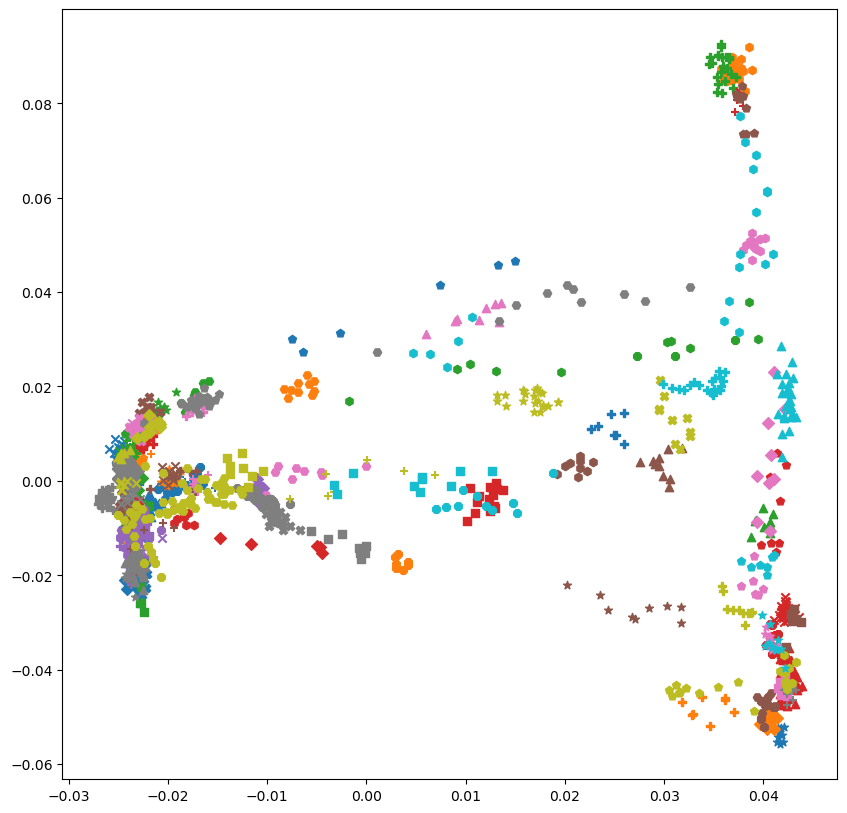

In [92]:
for cov_depth in [".25X", ".5X", "1X", "2X", "4X"]:
    df_sample2 = df_sample[df_sample["CovDepth"] == cov_depth]
    plot_pca(df_pca, df_population, df_sample2)
    break